# Excercise 42

## Preamble

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pylab as plt

## Implementing conditional pdfs and Posterior

$p(x|C_1) = \frac{1}{\sqrt{2\pi\sigma^2_1}}e^{-\frac{x-u_1}{2\sigma^2_1}}$

$P(C_1|x) = \frac{p(x|C_1)P(C1)}{p(x|C_1)P(C1)+p(x|C_2)P(C2)}$

In [2]:
def gauss_func(x,u,sigma_2):
    y = 1/(np.sqrt(2*np.pi*sigma_2))*np.exp(-1*(x-u)**2/(2*sigma_2))
    return y

def post(y1,y2):
    y = y1/(y1+y2)
    return y

## Plotting conditional pdfs

$u_1 = -0.3$
$u_2 = 1.1$
$\sigma_1^2=\sigma_2^2 = 0.8$

* Blue: $p(x|C_1)$
* Red: $p(x|C_2)$

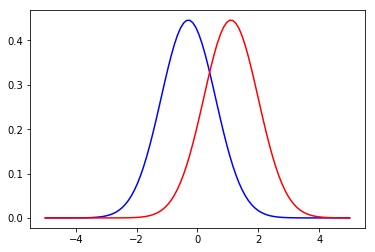

In [3]:
x = np.linspace(-5,5,100)

y1 = gauss_func(x,-0.3,0.8)
y2 = gauss_func(x,1.1,0.8)

plt.plot(x,y1,'b')
plt.plot(x,y2,'r')
plt.show()

## Likelihood

* Red square: $p(2|C_2)$
* Red dot: $p(0.2|C_2)$

In [4]:
y2_point1 = gauss_func(2,1.1,0.8)
y2_point2 = gauss_func(0.2,1.1,0.8)

y1_point1 = gauss_func(2,-0.3,0.8)
y1_point2 = gauss_func(0.2,-0.3,0.8)

print("Likelihood of 2 given C2: ",y2_point1)
print("Likelihood of 0.2 given C2: ",y2_point2)

Likelihood of 2 given C2:  0.2688459452829688
Likelihood of 0.2 given C2:  0.26884594528296873


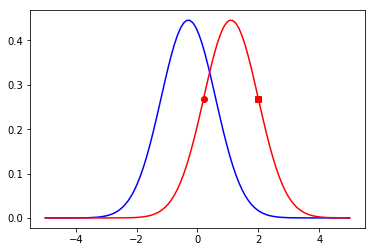

In [5]:
plt.plot(x,y1,'b')
plt.plot(x,y2,'r')
plt.plot(2,y2_point1,'rs')
plt.plot(0.2,y2_point2,'ro')
plt.show()

## Likelihood-ratio and Posterior

* $\frac{p(x|C_2)}{p(x|C_1)}$ - `l1` and `l2`
* $P(C_1|2)$ - `p1`
* $P(C_2|2)$ - `p2`
* $P(C_1|0.2)$ - `p3`
* $P(C_2|0.2)$ - `p4`

In [6]:
l1 = y2_point1/y1_point1
l2 = y2_point2/y1_point2

p1 = post(y1_point1,y2_point1)# Posterior: Chance of belonging to C1
p2 = post(y2_point1,y1_point1)# Posterior: Chance of belonging to C2
p3 = post(y1_point2,y2_point2)# Posterior: Chance of belonging to C1
p4 = post(y2_point2,y1_point2)# Posterior: Chance of belonging to C2

print("l1 : ",l1)
print("l2 : ",l2)
print("p1 : ",p1)
print("p2 : ",p2)
print("p3 : ",p3)
print("p4 : ",p4)

l1 :  16.444646771097045
l2 :  0.7046880897187134
p1 :  0.05732417589886876
p2 :  0.9426758241011312
p3 :  0.58661757891733
p4 :  0.41338242108266987


## Plot Posterior

* Blue dashed - $P(C_1|x)$
* Red dashed - $P(C_2|x)$

In [7]:
yp1 = post(y1,y2)
yp2 = post(y2,y1)

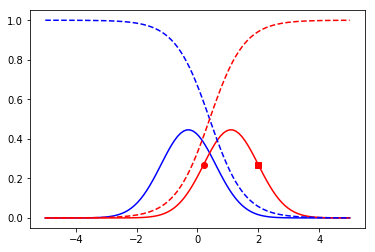

In [8]:
plt.plot(x,y1,'b')
plt.plot(x,y2,'r')
plt.plot(2,y2_point1,'rs')
plt.plot(0.2,y2_point2,'ro')
plt.plot(x,yp1,'b--')
plt.plot(x,yp2,'r--')
plt.show()